# Project: Medical Appointment No Shows - Exploratory Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project, I will analyze Medical Appointment No Shows dataset which is focused on the question: 
* A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?

This dataset contains 110.527 medical appointments in Brazil and its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment.

One of these variables is scholarship, and this variable refers to the concept of Bolsa Família. It is a social welfare program of the Government of Brazil. Bolsa Família provides financial aid to poor Brazilian families. The program attempts to both reduce short-term poverty by direct cash transfers and fight long-term poverty by increasing human capital among the poor through conditional cash transfers. It also works to give free education to children who cannot afford to go to school to show the importance of education. To find more, you can check this [link](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).


### The questions that we plan on exploring:
<ol>
<li><a href="#q1">Does age affect on people for showing up for their appointments? And which age segment is caring less/more about health?</a></li>
<li><a href="#q2">Which gender of each age segment is caring less/more about health?</a></li>
<li><a href="#q3">Which gender is commited more to their appointment, Male or Female?</a></li>
<li><a href="#q4">What is the percentage of the people who shown up for their appointments out of the total number?</a></li>
</ol>


**Data Dictionary**
* PatientId
	* Identification of a patient
* AppointmentID
	* Identification of each appointment
* Gender
	* Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
* AppointmentDay
	* The day of the actuall appointment, when they have to visit the doctor.
* ScheduledDay
	* The day someone called or registered the appointment, this is before appointment of course.
* Age
	* How old is the patient.
* Neighbourhood
	* Where the appointment takes place / indicates the location of the hospital.
* Scholarship
	* True of False
* Hipertension
	* True or False
* Diabetes
	* True or False
* Alcoholism
	* True or False
* Handcap
	* True or False
* SMS_received
	* 1 or more messages sent to the patient.
* No-show
	* ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# load data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# Displaying the shape and the first 5 rows of the dataset,
display(df.shape)
df.head()

(110527, 14)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


All columns has no Null values and the same number of entries which is great. We won't have the issue of Null values and handling it.

In [4]:
df.duplicated().sum()

0

We have no duplicate records too.

In [5]:
# Checking the number of the unique values for each variable, such as Neighbourhood, Handcap, and so on.
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df.groupby('Age').size()

Age
-1         1
 0      3539
 1      2273
 2      1618
 3      1513
        ... 
 98        6
 99        1
 100       4
 102       2
 115       5
Length: 104, dtype: int64

In [8]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# Checking how much the data covers over the year
df.AppointmentDay.sort_values()[:5]

0       2016-04-29T00:00:00Z
2151    2016-04-29T00:00:00Z
2152    2016-04-29T00:00:00Z
2153    2016-04-29T00:00:00Z
2154    2016-04-29T00:00:00Z
Name: AppointmentDay, dtype: object

In [10]:
df.AppointmentDay.sort_values()[-5:]

92055    2016-06-08T00:00:00Z
99217    2016-06-08T00:00:00Z
99218    2016-06-08T00:00:00Z
99224    2016-06-08T00:00:00Z
91900    2016-06-08T00:00:00Z
Name: AppointmentDay, dtype: object

### Assessing

#### Quality Issues
1. We won't use PatientId, AppointmentID, ScheduledDay, and AppointmentDay for analysis.
2. Age has a record of value = -1.
3. The name of No-show column could be inconvenient.

#### Tidiness Issues
There's no tidiness issue.

### Cleaning

In [11]:
df_clean = df.copy()

##### Define
1. Dropping PatientId, AppointmentID, ScheduledDay, and AppointmentDay as we won't use them for analysis.
2. Drop the record of Age = -1
3. Renaming No-show column by Show, and replacing Yes by 0 and No by 1 just for clarity and avoiding misconveniention.

##### Code

In [12]:
# 1. Dropping PatientId, AppointmentID, ScheduledDay, and AppointmentDay.
df_clean.drop(columns=['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], inplace=True)

In [13]:
# 2. Drop the record of Age < 0.
df_clean.drop(index=df_clean[df_clean['Age'] < 0].index[0], inplace=True)

In [14]:
# 3. Replacing No-show by show, Yes by 0, and No by 1
df_clean.rename(columns={'No-show': 'Show'}, inplace=True)
df_clean.loc[df_clean['Show'] == 'Yes', ['Show']] = 0
df_clean.loc[df_clean['Show'] == 'No', ['Show']] = 1

##### Test

In [15]:
df_clean[df_clean['Age'] < 0]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show


In [16]:
df_clean.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110526 non-null  object
 1   Age            110526 non-null  int64 
 2   Neighbourhood  110526 non-null  object
 3   Scholarship    110526 non-null  int64 
 4   Hipertension   110526 non-null  int64 
 5   Diabetes       110526 non-null  int64 
 6   Alcoholism     110526 non-null  int64 
 7   Handcap        110526 non-null  int64 
 8   SMS_received   110526 non-null  int64 
 9   Show           110526 non-null  object
dtypes: int64(7), object(3)
memory usage: 9.3+ MB


In [18]:
df_clean.Show = df_clean.Show.astype(int)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110526 non-null  object
 1   Age            110526 non-null  int64 
 2   Neighbourhood  110526 non-null  object
 3   Scholarship    110526 non-null  int64 
 4   Hipertension   110526 non-null  int64 
 5   Diabetes       110526 non-null  int64 
 6   Alcoholism     110526 non-null  int64 
 7   Handcap        110526 non-null  int64 
 8   SMS_received   110526 non-null  int64 
 9   Show           110526 non-null  int32 
dtypes: int32(1), int64(7), object(2)
memory usage: 8.9+ MB


<a id='eda'></a>
## Exploratory Data Analysis

Before answering the questions, let's explore the data first.<br>
I will explore the distructions of some columns like `Age`, `Gender`, `SMS_received`


In [19]:
## explorring features distribution
# No Show
df_clean['Show'].value_counts(normalize=True)

1    0.798066
0    0.201934
Name: Show, dtype: float64

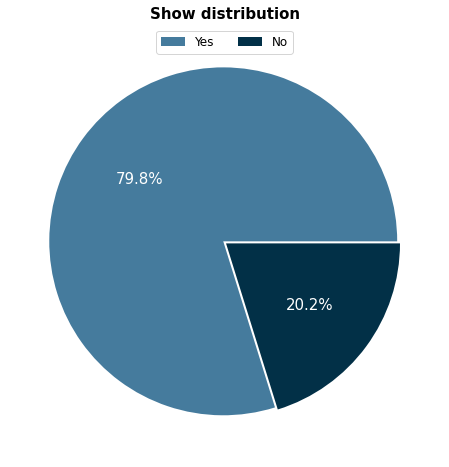

In [20]:
plt.figure(figsize=(8, 8))

labels = ['Yes', 'No']
colors = ['#457b9d', '#023047']
explode = [0.01, 0.01]


# df['Gender'].value_counts().plot.pie(labels=labels, autopct='%1.0f%%');
plt.pie(df_clean['Show'].value_counts(), colors=colors, autopct='%1.1f%%', textprops={'color':'w', 'size':15}, explode=explode)


plt.title('Show distribution', fontdict={'fontsize':15,'fontweight':'bold'})

plt.legend(labels, fontsize='large', ncol=2, loc=9)
plt.show()

**Only 20% of people did not show up on their appointments**

In [21]:
# No Show
df_clean['Gender'].value_counts(normalize=True)

F    0.649974
M    0.350026
Name: Gender, dtype: float64

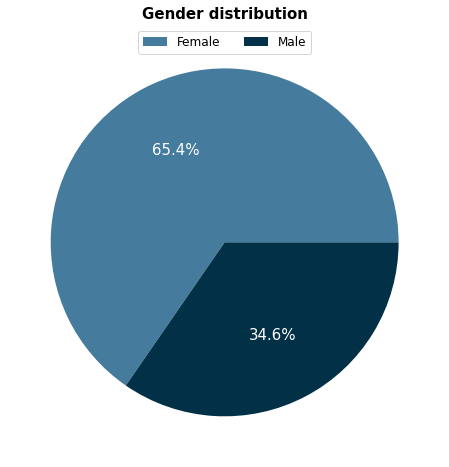

In [22]:
plt.figure(figsize=(8, 8))

labels = ['Female', 'Male']
colors = ['#457b9d', '#023047']
# df['Gender'].value_counts().plot.pie(labels=labels, autopct='%1.0f%%', textprobs={'color':'w'});
plt.pie(df_clean.query('Show == 0')['Gender'].value_counts(), colors=colors, autopct='%1.1f%%', textprops={'color':'w', 'size':15})


plt.title('Gender distribution', fontdict={'fontsize':15,'fontweight':'bold'})

plt.legend(labels, fontsize='large', ncol=2, loc=9)
plt.show()


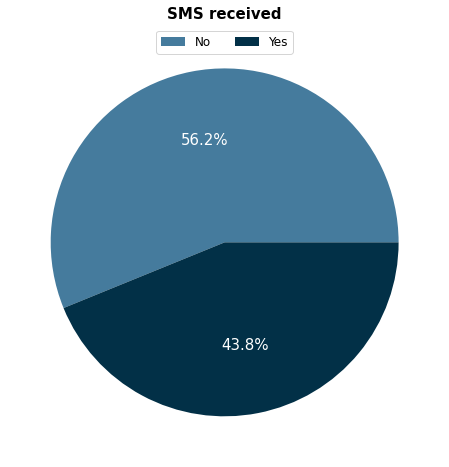

In [23]:
plt.figure(figsize=(8, 8))

labels = ['No', 'Yes']
colors = ['#457b9d', '#023047']
# df['Gender'].value_counts().plot.pie(labels=labels, autopct='%1.0f%%', textprobs={'color':'w'});
plt.pie(df_clean.query('Show == 0')['SMS_received'].value_counts(), colors=colors, autopct='%1.1f%%', textprops={'color':'w', 'size':15})


plt.title('SMS received', fontdict={'fontsize':15,'fontweight':'bold'})

plt.legend(labels, fontsize='large', ncol=2, loc=9)
plt.show()


**44% of people revieved SMS messeges**

<a id='q1'></a>
### Q1: Does age affect on people's appointments showing up ? And which age segment is caring less/more about health?

In order to gret a better understanding between the Age & Show variables, let's investigate the Age column.

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110526 non-null  object
 1   Age            110526 non-null  int64 
 2   Neighbourhood  110526 non-null  object
 3   Scholarship    110526 non-null  int64 
 4   Hipertension   110526 non-null  int64 
 5   Diabetes       110526 non-null  int64 
 6   Alcoholism     110526 non-null  int64 
 7   Handcap        110526 non-null  int64 
 8   SMS_received   110526 non-null  int64 
 9   Show           110526 non-null  int32 
dtypes: int32(1), int64(7), object(2)
memory usage: 8.9+ MB


In [25]:
# Number of showing ups for each age
df_clean.groupby('Age').sum().Show.sort_values(ascending=False)

Age
0      2900
1      1858
52     1449
56     1372
2      1366
       ... 
98        5
100       4
102       2
115       2
99        1
Name: Show, Length: 103, dtype: int32

As we can see it looks like that the largest number of showing up times is when `Age = 0`.

In [26]:
def replacing(df):
    """
    Segment each age into an age segment started from 5 to 85 years
    and divided by 10 years.
    First segment is from 0 to 5 years.
    Last segment is from 85 to the max years old person.
    Each segment in between is within 10 years range.
    
    returns: df, a dataframe contains the age segments.
    """
    lower = 5
    upper = 15
    lower_2 = lower
    upper_2 = upper
    
    # Segment the age into multiple segments using integers first then replace 
    # the integers with their corresponding string segment.
    df.loc[df.Age <= 5, ['Age']] = 5
    while(1):
        df.loc[(lower < df.Age) & (df.Age <= upper), ['Age']] = upper
        lower += 10
        upper += 10
        if upper > 85:
            break
    df.loc[df.Age > 85, ['Age']] = int(df_clean.Age.max())
    
    
    # Creating a copy from the cleaned dataset to segment the age.
    df.loc[df.Age == 5, ['Age']] = '0 - 5'
    while(1):
        df.loc[df.Age == upper_2, ['Age']] = '{} - {}'.format(lower_2+1, upper_2)
        upper_2 += 10
        lower_2 += 10
        if upper_2 > 85:
            break
    df.loc[df.Age == int(df_clean.Age.max()), ['Age']] = '86 - {}'.format(df_clean.Age.max()) 
    
    return df

In [27]:
# Creating a copy from the cleaned dataset to segment the age.
df_clean_segments = df_clean.copy()

df_clean_segments = replacing(df_clean_segments)

In [28]:
df_clean_segments.groupby('Age').count()

,Gender,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
Age,,,,,,,,,
0 - 5,11731,11731,11731,11731,11731,11731,11731,11731,11731
16 - 25,14131,14131,14131,14131,14131,14131,14131,14131,14131
26 - 35,14404,14404,14404,14404,14404,14404,14404,14404,14404
36 - 45,14582,14582,14582,14582,14582,14582,14582,14582,14582
46 - 55,15437,15437,15437,15437,15437,15437,15437,15437,15437
56 - 65,14203,14203,14203,14203,14203,14203,14203,14203,14203
6 - 15,12737,12737,12737,12737,12737,12737,12737,12737,12737
66 - 75,7909,7909,7909,7909,7909,7909,7909,7909,7909
76 - 85,4232,4232,4232,4232,4232,4232,4232,4232,4232


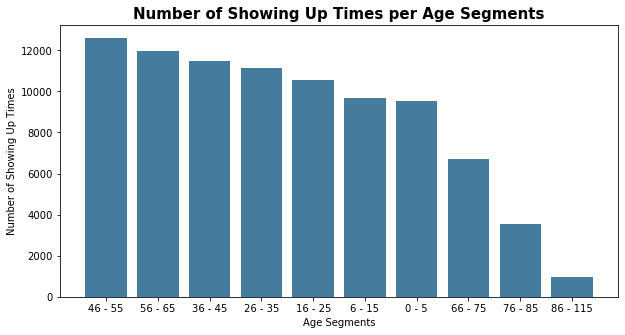

In [29]:
# Creating pandas series that contains the number of showing up(sum of 1s) for each age segment.
age_segments = df_clean_segments.groupby('Age').sum().Show.sort_values(ascending=False)

locations = np.arange(len(age_segments))
heights = list(age_segments)
labels = age_segments.index



f = plt.figure(figsize=(10, 5))

ax1 = f.add_subplot(1, 1, 1)
ax1.bar(locations, heights, tick_label=labels, color=colors[0])
ax1.set_title("Number of Showing Up Times per Age Segments", fontdict={'fontsize':15,'fontweight':'bold'})
ax1.set_xlabel("Age Segments")

ax1.set_ylabel("Number of Showing Up Times");

As we can see the largest times number is for age segments 46 - 65.

But, let's change the segments a bit to gather better insights.

In [30]:
# Creating a copy from the cleaned dataset to segment the age.
df_clean_segments = df_clean.copy()

# Creating a function for ease of age segmentation in next sections.
def segmenting(df_clean_segments):
    # Segment the age into multiple segments using integers first then replace the integers with their corresponding segment.
    df_clean_segments.loc[df_clean_segments.Age <= 5, ['Age']] = 5 # '0-5'
    df_clean_segments.loc[(5 < df_clean_segments.Age) & (df_clean_segments.Age <= 15), ['Age']] = 15 #'6-15'
    df_clean_segments.loc[(15 < df_clean_segments.Age) & (df_clean_segments.Age <= 25), ['Age']] = 25 #'16-25'
    df_clean_segments.loc[(25 < df_clean_segments.Age) & (df_clean_segments.Age <= 40), ['Age']] = 40 #'26-40'
    df_clean_segments.loc[(40 < df_clean_segments.Age) & (df_clean_segments.Age <= 60), ['Age']] = 60 #'41-60'
    df_clean_segments.loc[(60 < df_clean_segments.Age) & (df_clean_segments.Age <= 80), ['Age']] = 80 #'61-80'
    df_clean_segments.loc[df_clean_segments.Age > 80, ['Age']] = int(df_clean.Age.max()) #'81-{}'.format(df_clean.Age.max())

    # Replace the integers with their corresponding segment.
    df_clean_segments.loc[df_clean_segments.Age == 5, ['Age']] = '0 - 5'
    df_clean_segments.loc[df_clean_segments.Age == 15, ['Age']] = '16 - 25'
    df_clean_segments.loc[df_clean_segments.Age == 25, ['Age']] = '6 - 15'
    df_clean_segments.loc[df_clean_segments.Age == 40, ['Age']] = '26 - 40'
    df_clean_segments.loc[df_clean_segments.Age == 60, ['Age']] = '41 - 60'
    df_clean_segments.loc[df_clean_segments.Age == 80, ['Age']] = '61 - 80'
    df_clean_segments.loc[df_clean_segments.Age == int(df_clean.Age.max()), ['Age']] = '81 - {}'.format(df_clean.Age.max())

segmenting(df_clean_segments)

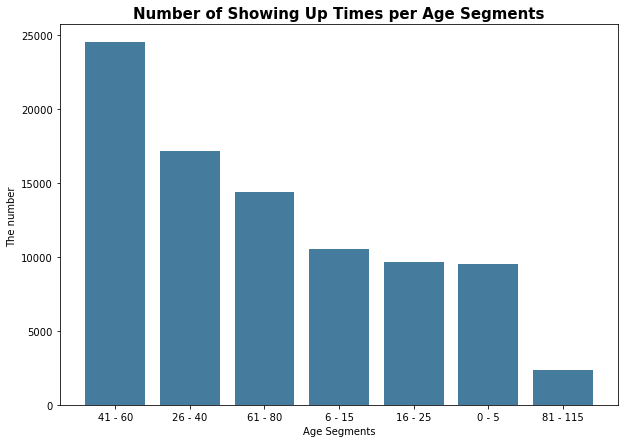

In [31]:
# Creating pandas series that contains the number of showing up(sum of 1s) for each age segment.
age_segments = df_clean_segments.groupby('Age').sum().Show.sort_values(ascending=False)

locations = np.arange(len(age_segments))
heights = list(age_segments)
labels = age_segments.index

f = plt.figure(figsize=(10, 7))

ax1 = f.add_subplot(1, 1, 1)
ax1.bar(locations, heights, tick_label=labels, color=colors[0])
ax1.set_title("Number of Showing Up Times per Age Segments", fontdict={'fontsize':15,'fontweight':'bold'})
ax1.set_xlabel("Age Segments")
ax1.set_ylabel("The number ");

The age segment from 41 to 60 years old are the most age segment showing up times for their appointment.

<a id='q2'></a>
### Q2: Which gender of each age segment is caring less/more about health?

In [32]:
# Hot encoding the gender column > Which means we should drop the rest columns for avoiding misconvinention,
# and focusing only on the columns that we're going to use.
one_hot_df_clean = pd.get_dummies(df_clean.drop(columns=['Neighbourhood', 'Scholarship', 'Hipertension',
                                                         'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']))

In [33]:
one_hot_df_clean.head(10)

,Age,Show,Gender_F,Gender_M
0,62,1,1,0
1,56,1,0,1
2,62,1,1,0
3,8,1,1,0
4,56,1,1,0
5,76,1,1,0
6,23,0,1,0
7,39,0,1,0
8,21,1,1,0
9,19,1,1,0


In [34]:
# Creating a copy from the one hot encoded data to segment the age.
df_clean_segments = one_hot_df_clean.copy()


# Segment the age into multiple segments using the previous function
segmenting(df_clean_segments)

In [35]:
df_clean_segments[df_clean_segments.Show == 1].groupby('Age').sum()

,Show,Gender_F,Gender_M
Age,,,
0 - 5,9546,4545.0,5001.0
16 - 25,9674,4825.0,4849.0
26 - 40,17180,12256.0,4924.0
41 - 60,24490,16798.0,7692.0
6 - 15,10561,7623.0,2938.0
61 - 80,14373,9585.0,4788.0
81 - 115,2383,1613.0,770.0


In [36]:
one_hot_df_clean_segments = df_clean_segments[df_clean_segments.Show == 1].groupby('Age').sum()

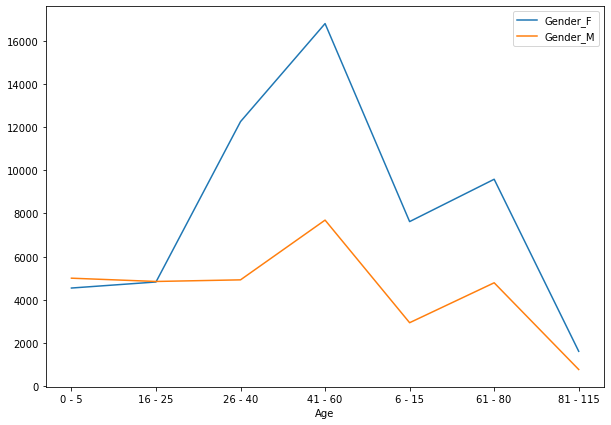

In [37]:
one_hot_df_clean_segments.drop(columns='Show').plot(figsize=(10,7));

From analyzing this chart, we can clearly notice that below 5 years old, the number of shown up males is a little bit larger. 

The number of shown up females is larger in all rest segments. However both genders is increasing from segment 16-25 years and reaching the maximum at 41-60 ,then decreasing till reaching the minimum shown up at the segment 81-115 years old. 

<a id='q3'></a>
### Q3: Which gender is commited more to their appointment, Male or Female?

In order to answer that question we need firstly to analyze the Gender with Show columns. We want to know the number of Shown up appointments and number of didn't show up appointments for each gender. Then we can simply divide each number over the total number of appointments to know what is the percentage of shown up and not shown up for each gender.

Firstly, we're gonna encode the Show Show_0 & Show_1 columns. Then we group them by Gender and sum them to finally result in the number of Show_0 & Show_1 of each gender. Then plotting these findings for clearer investigation.

In [38]:
# Hot encoding the Show column > Which means we should drop the rest columns for avoiding misconvinention,
# and focusing only on the columns that we're going to use.
show_encoded = pd.get_dummies(df_clean.drop(columns=['Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
                                                     'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']), 
                              columns=['Show'])

In [39]:
show_encoded

,Gender,Show_0,Show_1
0,F,0,1
1,M,0,1
2,F,0,1
3,F,0,1
4,F,0,1
...,...,...,...
110522,F,0,1
110523,F,0,1
110524,F,0,1
110525,F,0,1


In [40]:
show_encoded.groupby('Gender').sum()

,Show_0,Show_1
Gender,,
F,14594.0,57245.0
M,7725.0,30962.0


In [41]:
# Let's check that we did is right by comparing the total number of Show_0 & Show_1 
# for each genders with the total number of records.
show_encoded.groupby('Gender').sum().sum().sum() == len(df_clean.Show)

True

Perfect. Ther're equal. Let's move on and transpose the dataframe for somoother dealing.

In [42]:
show_encoded.groupby('Gender').sum().T

Gender,F,M
Show_0,14594.0,7725.0
Show_1,57245.0,30962.0


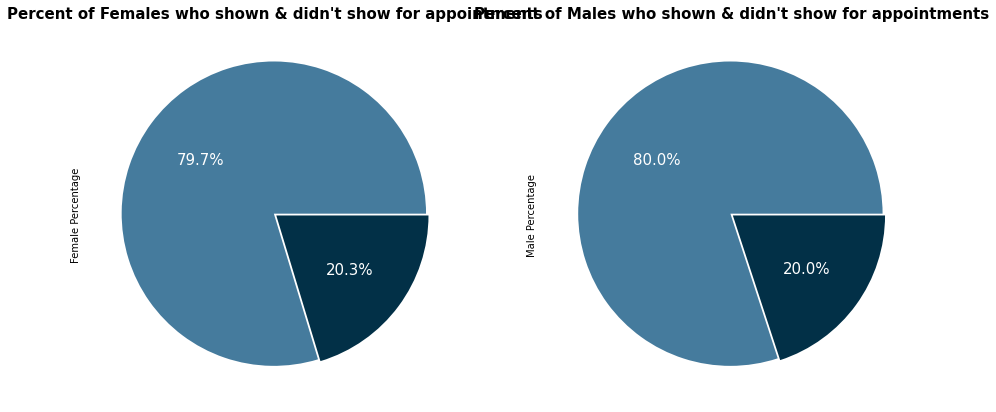

In [43]:
# Creating 2 pandas series for each Male and Female, and sorting the values as well.
show_percent_f = show_encoded.groupby('Gender').sum().T['F'].sort_values(ascending=False)
show_percent_m = show_encoded.groupby('Gender').sum().T['M'].sort_values(ascending=False)

sizes_f = list(show_percent_f)
sizes_m = list(show_percent_m)

# Changing the labels of the chart
labels = ['Shown', "Didn't Shown"]
colors = ['#457b9d', '#023047']
explode = [0.01, 0.01]

f = plt.figure(figsize=(15, 7))

ax1 = f.add_subplot(1, 2, 1)
ax2 = f.add_subplot(1, 2, 2)

ax1.pie(sizes_f, colors=colors,autopct='%1.1f%%',textprops={'color':'w', 'size':15}, explode=explode)
ax1.set_title("Percent of Females who shown & didn't show for appointments",fontdict={'fontsize':15,'fontweight':'bold'});
ax1.set_ylabel("Female Percentage")


ax2.pie(sizes_m, labels=labels, colors=colors,autopct='%1.1f%%',textprops={'color':'w', 'size':15}, explode=explode)
ax2.set_title("Percent of Males who shown & didn't show for appointments",fontdict={'fontsize':15,'fontweight':'bold'})
ax2.set_ylabel("Male Percentage");


Both genders are nearly commited with the same ratio for their appointments.

<a id='q4'></a>
### Q4: What is the percentage of the people who shown up for their appointments out of the total number?

In [44]:
total_number_of_appointments = df_clean.Show.count()
print("The total number of appointments is :", total_number_of_appointments)

The total number of appointments is : 110526


In [45]:
show_up_number = df_clean.Show.sum()
print("The Number of the people of only show up for their appointments is :", show_up_number)

The Number of the people of only show up for their appointments is : 88207


In [46]:
percentage_of_show_up = (show_up_number/total_number_of_appointments) * 100
print("{:.2f}%".format(percentage_of_show_up))

79.81%


In [47]:
show_df_clean = df_clean.copy()
show_df_clean.loc[show_df_clean.Show == 1, ['Show']] = 'Shown'
show_df_clean.loc[show_df_clean.Show == 0, ['Show']] = "Didn't Shown"

In [48]:
show_df_clean.groupby('Show')['Show'].count().sort_values(ascending=False)

Show
Shown           88207
Didn't Shown    22319
Name: Show, dtype: int64

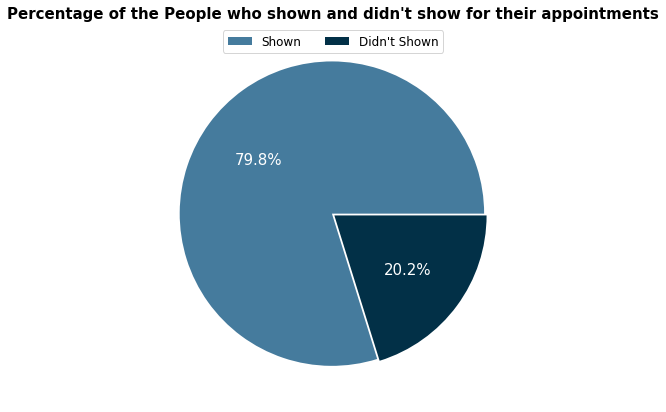

In [49]:
show_percent = show_df_clean.groupby('Show')['Show'].count().sort_values(ascending=False)

sizes = list(show_percent)
labels = show_percent.index
colors = ['#457b9d', '#023047']
explode = [0.01, 0.01]

f = plt.figure(figsize=(10, 7))

ax1 = f.add_subplot(1, 1, 1)
ax1.pie(sizes, labels=labels, colors=colors, explode=explode,textprops={'color':'w', 'size':15},
        autopct='%1.1f%%')
ax1.set_title("Percentage of the People who shown and didn't show for their appointments", fontdict={'fontsize':15,'fontweight':'bold'});
plt.legend(labels, fontsize='large', ncol=2, loc=9);



`79.8%` has shown up and `20.2%` didn't shown.

#### Heartmap
One important thing is to have an insight about the correlation between the variables. So, let's create a heatmap of all the feature variables. Heatmap is an extremely powerful way to visualize relationships between variables in high dimensional space and commonly use in Exploratory Data Analysis (EDA).

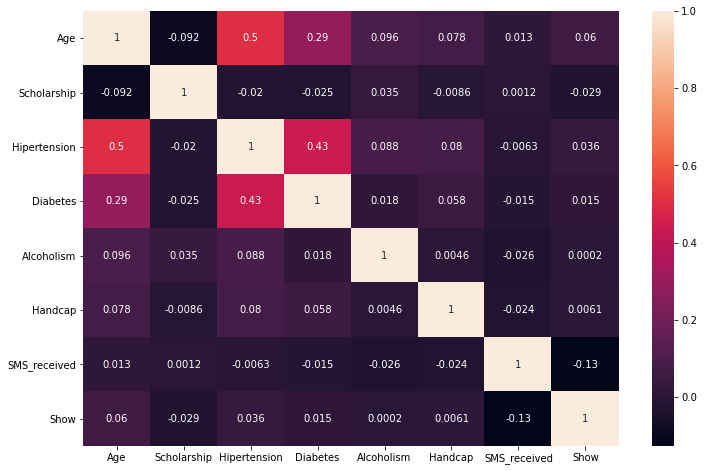

In [50]:
# plot the heatmap
f = plt.figure(figsize=(12, 8))
ax1 = f.add_subplot(1, 1, 1)

corr = df_clean.corr()
sns.heatmap(corr,
            annot=True,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
           );

<a id='conclusions'></a>
## Conclusions

* Age affects on people commitment towards their health strongly.
    1. Age segment from 41 to 60 years old are more commited for appointments and caring more about their health. 
    2. Age segment from 81 to 115 years old are almost don't care about their age. 
    



* In general females are caring of their health more then males. Except that the number is almost equal at age segment of less than 5 years, but this because that at this age they don't have the descion of caring their health or not.


* The ratio of showing up for each gender they're almost the same.

* As obvious from the heatmap visualization, there's a relation between Age & Hibertention and Diabetes & Hibertension. Which would be useful in our future analysis that would tackle these variables.


### Limitations and Missing Information
As discovered in the General Properties of the <a href="#wrangling">Data Wrangling</a> part:

* The data only covers a span of a month and 10 days, which is very small sample with respect to the whole year. And this specific missing information could misbalance the findings.

* The number of Neighbourhoods stated in the dataset is only 81 one, which is not a representative sample of the population.

* It would be very useful, if there's a column indicates the average income for each person.

* It would be very useful, if there's a column indicates the level of education for each person.

* It would be very useful, if there's a column indicates the class of the hospital (which indicates its price).

* It would be very useful, if there's a column indicates whether there's a puplic transportaion in the Neighbourhood or not.

###  Questions that we could explore in the future:
- Which areas recives the largest number of appointments? / Which areas that their people have a lot of health issues?
- Which areas that their people are commited to their appointments?
- Are the enrolled people in Bolsa Família program more commited for showing up for their appointment?
- Does having a mental or physical disadvantage (such as Hipertension, Diabetes, Alcoholism, and Handcap) affect on showing up for appointment? If yes, describe.
- Does sending SMS matter for reminding people to show up?

In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295